In [1]:
# test_find_dune_toe
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def find_toe(dist,z,s=0.2,ztoe=2.4,izero='offshore',iplot=True):
    """
    Find the toe of the dune using three algorithms:
      * Most offshore occurrence of z>=ztoe
      * Maximum inflection point
      * Longest chord from reference slope to elevations
      
    Input:
      dist = distance along profile (m; no origin necessary)
      z = elevation profile (m)
      s = slope of reference line (m/m)
      ztoe = elevation of fixed dune toe (m)
      izero = 'offshore' or 'onshore' - origin of profile
      
    Returns:
      izz - index of toe using fixed elevation method (same as input value; m)
      iztoe - index of toe using distance from reference line (m)
      izi - index of toe using inflection point (m)
      zz - elevation of toe using fixed elevation method (same as input value; m)
      ztoe - elevation of toe using distance from reference line (m)
      zi - elevation of toe using inflection point (m)
      
    Note: assumes maximum z == foredune crest. If not, then pass a shortened transect that only include dune and beach
    """
    # initialize return values to NaN
    izz = np.nan
    iztoe = np.nan
    izi = np.nan
    zz = np.nan
    ztoe = np.nan
    zi = np.nan
    
    # find highest point
    izmax = np.argmax(z)
    zmax = z[izmax]
    dmax = dist[izmax]

    # make dist, z, and dz/ddist arrays from that point
    db = dist[izmax:-1]-dmax
    zb = z[izmax:-1]
    dzb = np.array([0])
    dzb = np.append(dzb,np.diff(zb)/np.diff(db))

    # make a reference line
    zr = zmax - s*db
    # find greatest vertical diff between ref line and topography
    zd = zr-zb
    # indices to those points
    iztoe = np.argmax(zd)
    izi = np.argmin(dzb)

    if iplot == True:
        fig,ax = plt.subplots(2,1)
        ax[0].plot(db,zb)
        ax[0].plot(db,zr)
        ax[0].plot(db[iztoe],zb[iztoe],'or')
        ax[0].plot(db[izi],zb[izi],'ob')
        ax[1].plot(db,dzb)
        ax[1].plot(db[iztoe],dzb[iztoe],'or')
        ax[1].plot(db[izi],dzb[izi],'ob')
        
    if izero == 'offshore': #transect goes from offshore to onshore
        print(izmax,iztoe)
        izz = izmax+izz
        iztoe = izmax+iztoe
        izi = izmax+izi
    
    else: # transect from onshore to offshore
        print(izmax,iztoe)
        izz = izmax+izz
        iztoe = izmax+iztoe
        izi = izmax+izi
    
    print(dmax,zmax)
    
    return izz,iztoe,izi,zz,ztoe,zi

489 65
46.839 4.909


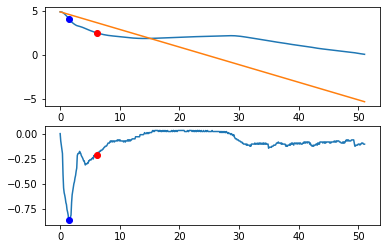

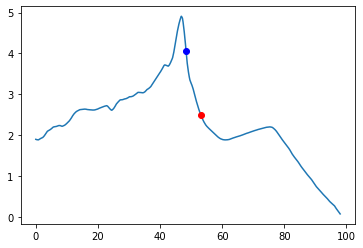

In [22]:
df = pd.read_csv('test_profile4.csv')

dist = df['Distance (Total)'].values
z = df['Elevation'].values

izz,iztoe,izi,zz,ztoe,zi = find_toe(dist,z,s=0.2,ztoe=2.4,izero='onshore')

fig, ax = plt.subplots(1,1)
plt.plot(dist,z)
plt.plot(dist[iztoe],z[iztoe],'or')
plt.plot(dist[izi],z[izi],'ob')